# Week 9: Networks 1


A network is a way to represent a system of things that interact or are interrelated in some fashion. It could just be your facebook network, that's obvious, but a network can also represent the interaction patterns of proteins in the human body, who votes what on whose bill in the US Senate, the mutually attractive forces between galaxies in the universe or just about anything else that you can possibly imagine. This week we will get started on some of the fundamental concepts, and then look closer at some Facebook data. In the exercises today you will:

* Get warmed up to thinking about systems as networks
* Learn to use the `NetworkX` library
* Explore a Facebook network

# Lecture

In [1]:
# ----------------- !
# Execute this cell !
# ----------------- !

from IPython.display import HTML

def video_html(url):
    return f"""
    <div align="middle">
    <video width="50%" controls>
      <source src="{url}" type="video/mp4">
    </video></div>"""

HTML(video_html('https://www.dropbox.com/s/43ya0a9jmaa6exk/slides_week9_mov.m4v?raw=1'))

## Imports

In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf

## Exercises

### Part 0: Networks

Questions for chapter 1 and 2 of [Network Science](http://barabasi.com/networksciencebook/).

> **Ex. 5.0.1**: List three different real networks and state the nodes and links for each of them.

1. Friendship network. A person is a node and a frienship is link.
2. Airport network. An airport is a node and a non-stop flight is link.
3. World Wide Web. A web page is a node and a hyperlink is a link. 

> **Ex. 5.0.2**: What networks are you personally most interested in. Address the following questions:
>   * What are its nodes and links? 
>   * How large is it? 
>   * Can be mapped out? 
>   * Why do you care about it? 

I consider: Friendship network (for instance based on Facebook data)
- **What are its nodes and links?** Persons are nodes and friendships are links.
- **How large is it?** Very large. Billions of nodes and many links per node.
- **Can be mapped out?** In practice, no. In theory, yes.
- **Why do you care about it?** Cool to understand social structures.

> **Ex. 5.0.3**: In your view what would be the area where network science could have the biggest impact in the next decade? Explain your answer - and base it on the text in the book. 

In these COVID-19 times, it seems like it might be useful for modelling the spread of disease, as discussed in the book. This might allow that a pandemic in the future can be avoided or the impact of it can be lessened.

> **Ex. 5.0.4**: Section 2.5 states that real networks are sparse. Can you think of a real network where each node has *many* connections? Is that network still sparse? If yes, can you explain why?

In the frienship network example, each node has many connections (most people on Facebook have >100 friends). Yet, the network is still extremely sparse, since there are billions of potential friends, such that 100/billion approximately equals 0.

### Part 1: The `NetworkX` library

`NetworkX` is the Python library we will be using for working with networks. It should come installed with your Anaconda distribution, but you wont know how to use it yet. The best way to get familiar is to work through a tutorial. That's what the following exercises are about.

> **Ex. 5.1.1**: Go to the `NetworkX` project's [tutorial page](https://networkx.github.io/documentation/stable/tutorial/index.html). Read the first few sections about nodes, edges and attributes. Write an example below where you create a graph, `G`, and then:
1. add some nodes and edges to,
2. print its nodes and edges
3. delete a node, and
4. plot it.

Nodes: [1, 2, 3, 4, 5]
Edges: [(1, 2), (1, 5), (2, 3), (2, 4), (2, 5), (3, 5), (3, 4)]


C:\Users\Jacob\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


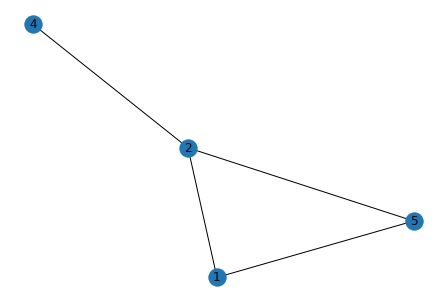

In [3]:
# I have tried to solve the problems without looking at the writeup at all this time --- hopefully my answers make sense!

import networkx as nx
import matplotlib.pyplot as plt

# Make graph
G = nx.Graph()

# 1.A. Add 5 nodes
G.add_nodes_from([1,2,3,4,5])

# 1.B. Add 5 edges
G.add_edges_from([(1,2),(2,3),(1,5),(3,5),(4,2),(2,5),(3,4)])

# 2. Print nodes and edgess
print('Nodes: {}'.format(G.nodes))
print('Edges: {}'.format(G.edges))

# 3. Remove node
G.remove_node(3)

# 4. Draw network
nx.draw(G, with_labels=True)

> **Ex. 5.1.2**: `NetworkX` has lots of functions to generate synthetic networks. One of the most famous types of synthetic networks is called an Erdős–Rényi (ER) network.
1. Describe what an ER network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating an ER network. Create one with $N=100$ nodes and probability of edge creation $p=0.1$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created ER graph.
    * A node's *degree* is the number of other nodes it is connected to.
    * The *degree distribution* is a histogram which shows the distribution of node degrees.

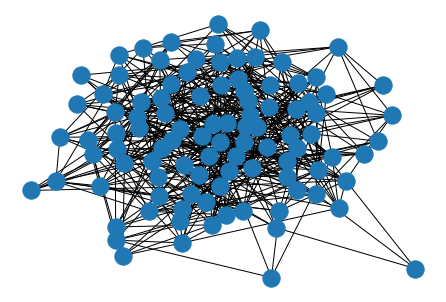

In [4]:
# 1. ANSWER: An G(N,p) ER network is a network with N nodes where each edge is included in the graph with probability p

# 2. Create ER network
G = nx.erdos_renyi_graph(100, 0.1)

# 3. Plot the network
nx.draw(G)

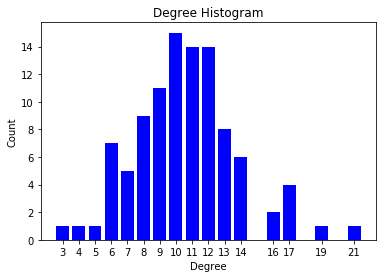

In [5]:
# 4: Visualize the degree distribution
import collections

# Function for preparing data for hist
def prepare_hist(lst, remove_last = False):
    # Prepare data
    sequence = sorted([d for n, d in lst], reverse=True) # Sorted list of all values
    count = collections.Counter(sequence)                # Count how many of each value there is
    val, cnt = zip(*count.items())                       # Store in two seperate lists
    if remove_last:
        val = val[:-1]
        cnt = cnt[:-1]
    return val, cnt

# Function for visualizing degree distribution of network
def degree_distribution(G):
    # Prepare data for histogram
    deg, cnt = prepare_hist(G.degree)

    # Plot
    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d for d in deg])
    ax.set_xticklabels(deg)
    
# Plot degree distribution
degree_distribution(G)

> **Ex. 4.1.3**: Another very famous type of synthetic network is the Barabási–Albert (BA) network.
1. Describe what a BA network is and how to create one.
2. On the [`NetworkX` documentations site](https://networkx.github.io/documentation/networkx-1.10/reference/generators.html), find a method you can use for generating a BA network. Create one with $N=100$ nodes and number of new edges from each new node $m=2$.
3. Plot the network
4. Visualize the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution) of your newly created BA graph.
5. Explain the main difference(s) you observe, when comparing to the ER network.
6. Are there other measures we could have used to describe the ER and BA networks further?

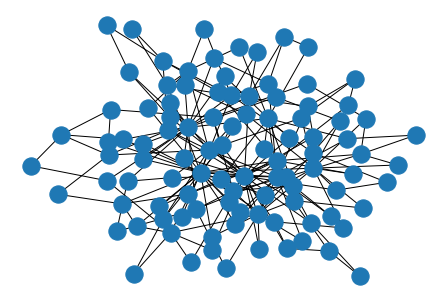

In [6]:
# 1. ANSWER: The network starts til m_0 connected nodes. New nodes are then added one at a time.
#            Each new node is connection to m <= m_0 of the existing nodes with probability
#            proportional to the number of links that the existing nodes already have.
#            The interpretation is that new nodes prefer to link to already heavily linked nodes.

# 2. Create BA network
G = nx.barabasi_albert_graph(100, 2)

# 3. Plot the network
nx.draw(G)

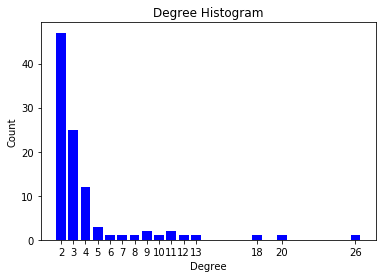

In [7]:
# 4. Visualize the degree distribution
degree_distribution(G)

# 5. Main differences between ER and BA
#    ANSWER: The degree distribution is much more heavy-tailed for the BA graph. This is consistent with
#            the intuition of a few heavily linked nodes.

# 6. Other measures to describe the network
#    ANSWER:
#    - Diameter of network
#    - Mean degree
#    - The average clustering coefficient

### Part 2: Facebook network

Now that you know how to build a network in `NetworkX`, visualize it and plot some statistics, you are ready to analyze today's dataset. We will be using [this facebook dataset](http://socialnetworks.mpi-sws.org/data-wosn2009.html) collected by the researchers at the Max Planck Institute. Go ahead and download the list of wall posts. Put the file in the same directory as this notebook and load it like:

In [8]:
data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

data.head(10)

user1  user2   timestamp
0     28     28  1095135831
1   1015   1017  1097725406
2    959    959  1098387569
3    991    991  1098425204
4   1015   1017  1098489762
5   1015   1017  1098673897
6   3368   3368  1098755376
7  14752  14736  1099526971
8   1015   1017  1099602800
9   1531   1080  1099889279

As you can see this is a *temporal network* (in that edges are timestamped). Time is given in UNIX timestamps. Though there are ways to model such
a network in its entire complexity, we'll start simple and just take a slice of it out and treat that as a static
network. You can create a `nx.DiGraph` from a slice of time like:

In [9]:
t0 = data.timestamp.max() - 86400 * 7  # Lower bound of time-slice (here: 7 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice

# Subset of the pandas dataframe
data_t = data.loc[data.timestamp.between(t0, t1)]

# Count the number of times each link occurs and store that in a new 'weight' column
data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

# Create a `nx.DiGraph` from this dataframe
G_t = nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)

> **Ex: 5.2.1**: Convert the above sample code into a function where you can easily input `t0` and `t1` of the slice, and get a `nx.DiGraph` in return. Create the aggregated network for the last 365 days of the data. Print the number of nodes and edges.

In [10]:
# Function for getting slice of data
def get_slice(t0,t1,data=data,slice_end=0):
    # Subset of the pandas dataframe
    data_t = data.loc[data.timestamp.between(t0, t1)]

    # Count the number of times each link occurs and store that in a new 'weight' column
    data_t = data_t.groupby(['user1', 'user2']).size().reset_index(name='weight')

    # Create a `nx.DiGraph` from this dataframe, possibly slicing dataframe
    if slice_end == 0:
        return nx.from_pandas_edgelist(data_t, 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    else:
        return nx.from_pandas_edgelist(data_t[:slice_end], 'user1', 'user2', 'weight', create_using=nx.DiGraph)
    
# Create graph
t0 = data.timestamp.max() - 86400 * 365
t1 = data.timestamp.max()
G_t = get_slice(t0,t1)

# Print nodes and edges
print('Nodes: {}'.format(len(G_t.nodes)))
print('Edges: {}'.format(len(G_t.edges)))

Nodes: 44397
Edges: 201632


> **Ex: 5.2.2**: Since it's a directed network, there are two degree distributions we can plot: one for the
in-degrees and another for the out-degrees. Plot them both in the same figure (remember to add a legend).
The distribution is very heavy-tailed, so you may want to log-scale both axes. Comment on the result. Does
it resemble any of the network models you know?
>
> *Hint: use `Counter` to count how many times each degree-value occurs and then scatter plot the degree-values
against counts. When you log-scale the axes, zero values cause trouble, so you should remove the data point for
degree 0.*

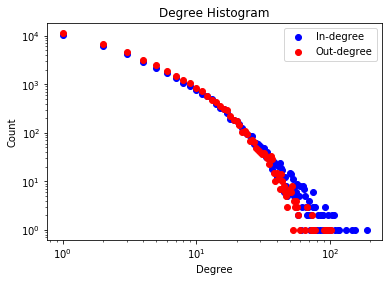

In [11]:
# Prepare data
in_deg, in_cnt = prepare_hist(G_t.in_degree(), True)
out_deg, out_cnt = prepare_hist(G_t.out_degree(), True)

# Plot
plt.scatter(in_deg, in_cnt,color='b',label='In-degree')
plt.scatter(out_deg, out_cnt,color='r',label='Out-degree')
plt.legend()
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xscale("log")
plt.yscale("log")

# COMMENTS:
# I see that both degree distributions are very heavy-tailed. Notably, the in-degree distribution is more heavy-tailed.
# The degree distributions seems most similar to the BA network, which was also heavy-tailed.

> **Ex: 5.2.3**: Using a histogram plot the distribution of (weighted) local clustering coefficients ([docs](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering)). Which distribution does it appear to follow?
>
> *Hint: figure out how to plot a histogram with logarithmic bins.*

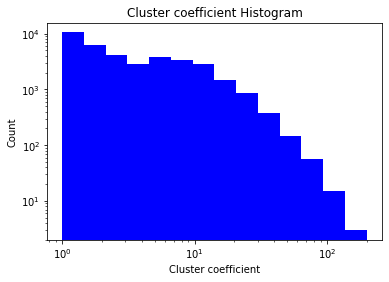

In [12]:
import numpy as np

# Prepare data
cluster_sequence = sorted([c for n, c in G_t.in_degree()], reverse=True) # Sorted list of all cluster coefficients

# Plot
fig, ax = plt.subplots()
plt.hist(cluster_sequence, color='b', bins = np.logspace(np.log10(1),np.log10(200), 15))
plt.title("Cluster coefficient Histogram")
plt.ylabel("Count")
plt.xlabel("Cluster coefficient")
plt.xscale("log")
plt.yscale("log")

We want to plot the network so we can visually get a feeling for how people are connected. `networkx`'s `nx.draw` method won't cut it here, it's too slow and has bad layout support for large networks, so instead we'll use `netwulf` ([docs](https://netwulf.readthedocs.io/)) to visualize networks in a browser-app I made (still in beta, bugs may occur). But even with this tool, the network of one year is still too big to make nice visualizations, so we have to reduce the number of links and nodes by some heuristic. This could for example be to threshold link weight to reduce the number of links, thresholding weighted node degree (or other relevant metrics).

> **Ex: 5.2.4**: Threshold the network by some meaningful heuristic so it has around 5000 nodes and 20000 edges. Then launch a visualization of it using `netwulf`, style the network so it looks nice and download (or screenshot) the figure and put it into the cell below. State explicitly what thresholds you apply and why you think they make sense. Comment on the result. Do you see anything interesting in this network or is it just a big hairball?
>
> *Hint: The longer you let the nodes **wiggle** the nicer the network will look.*

In [13]:
# Create network from subset of data based on heuristic
G_t = get_slice(t0,t1,slice_end=15000)

# HEURISTIC: Take slice of 15000 last observations in dataset, which gives approximately the desired
#            amount of nodes and edges.

In [14]:
# Visualize network
visualize(G_t)

# COMMMENT: It honestly mostly looks like a hairball.

(None, None)

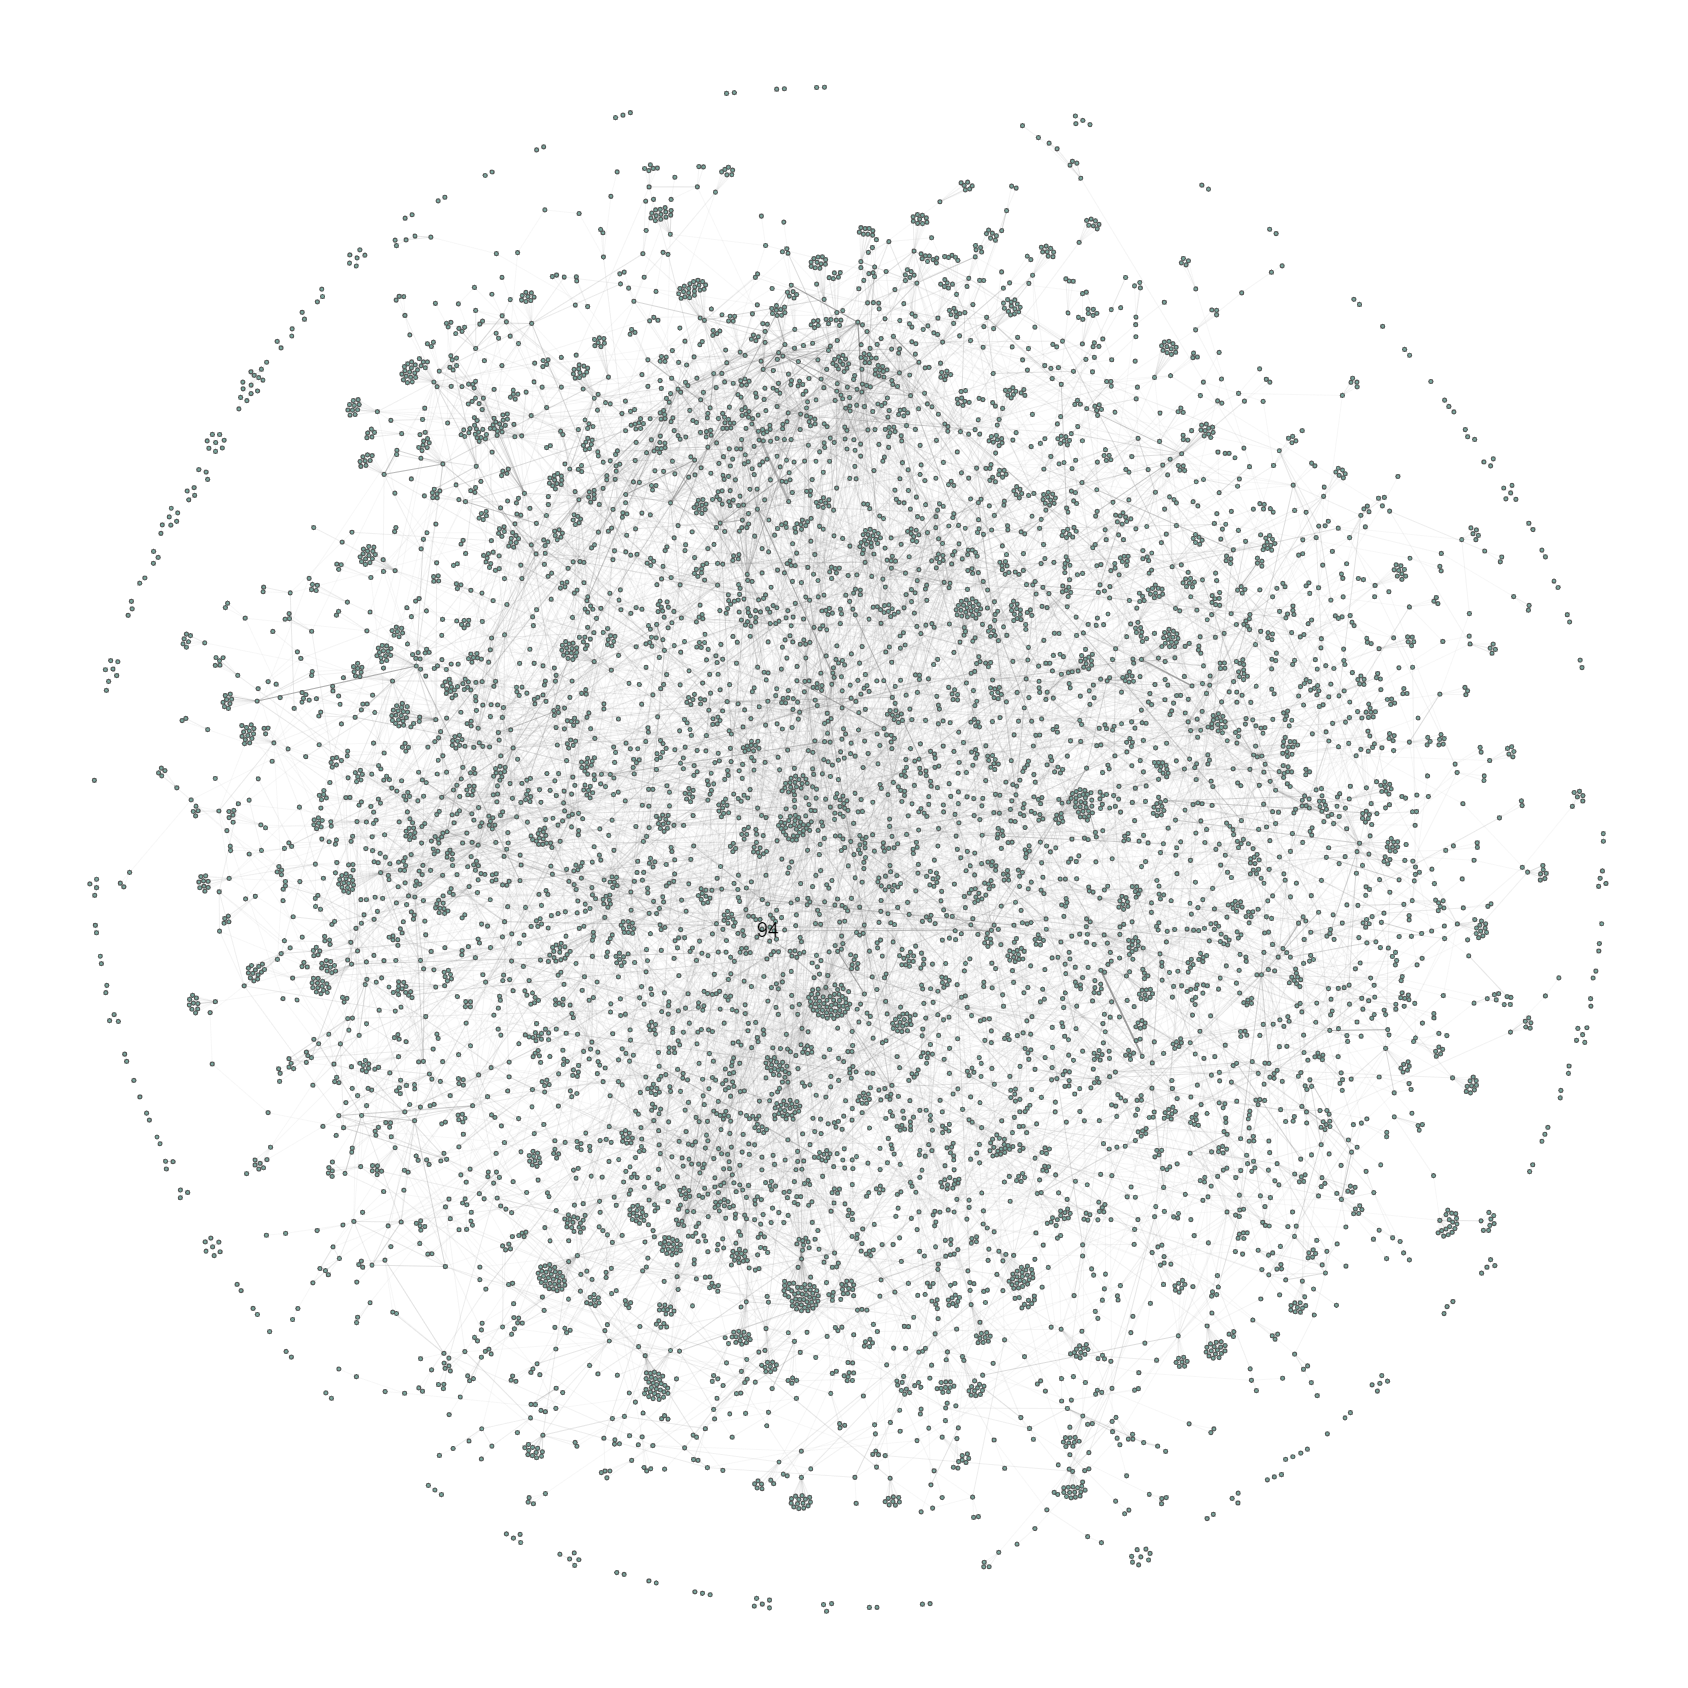